### Histograms, Binning and Density

A simple histogram can be a great first step in understanding a dataset. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

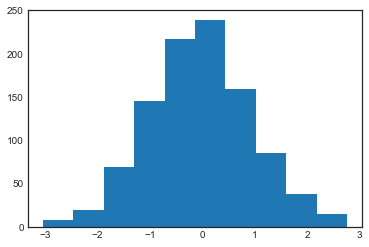

In [7]:
rng = np.random.RandomState(0)
data = rng.randn(1000)
plt.hist(data);

The `hist()` function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

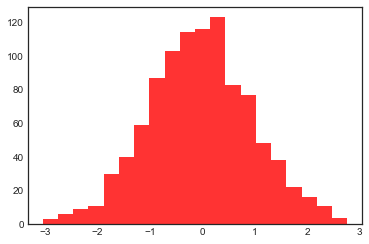

In [15]:
plt.hist(data, bins = 20, alpha = 0.8, 
        histtype = 'stepfilled', color = 'red',
        edgecolor = 'none');

The `plt.hist` docstring has more information on other customization options available. I find this combination of `histtype='stepfilled'` along with some transparency `alpha` to be very useful when comparing histograms of several distributions:

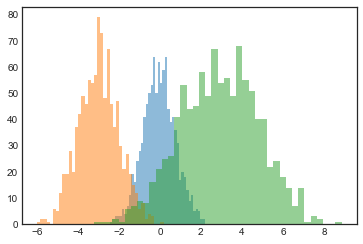

In [18]:
rng = np.random.RandomState(0)
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-3, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype = 'stepfilled', bins = 40, alpha = 0.5)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the np.histogram() function is available:

In [19]:
counts, bin_edges = np.histogram(data, bins = 5)
print(counts)

[ 29 216 456 246  53]


### Two dimensionsal Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. We'll take a brief look at several ways to do this here. We'll start by defining some data—an x and y array drawn from a multivariate Gaussian distribution:

In [21]:
mean = [0, 0]
conv = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, conv, 1000).T

### Two 2-d Histogram `plt.hist2d()`

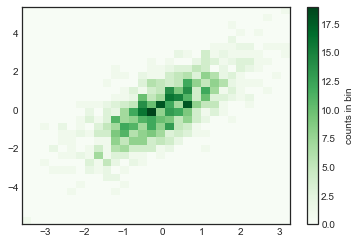

In [23]:
plt.hist2d(x, y, bins=30, cmap='Greens')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with `plt.hist`, `plt.hist2d` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring. Further, just as plt.hist has a counterpart in `np.histogram`, `plt.hist2d` has a counterpart in `np.histogram2d`, which can be used as follows:

In [27]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the `np.histogramdd` function.

### Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes. Another natural shape for such a tesselation is the regular hexagon. For this purpose, Matplotlib provides the `plt.hexbin` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

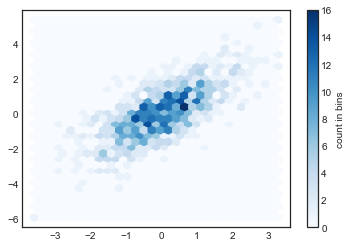

In [30]:
plt.hexbin(x, y, gridsize = 30, cmap = 'Blues')
cb = plt.colorbar(label = 'count in bins')

`plt.hexbin` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any `NumPy` aggregate (mean of weights, standard deviation of weights, etc.).

### Kernel Density Estimation

Another common method of evaluating densities in multiple dimensions is kernel density estimation (KDE). 